# Twitter Data

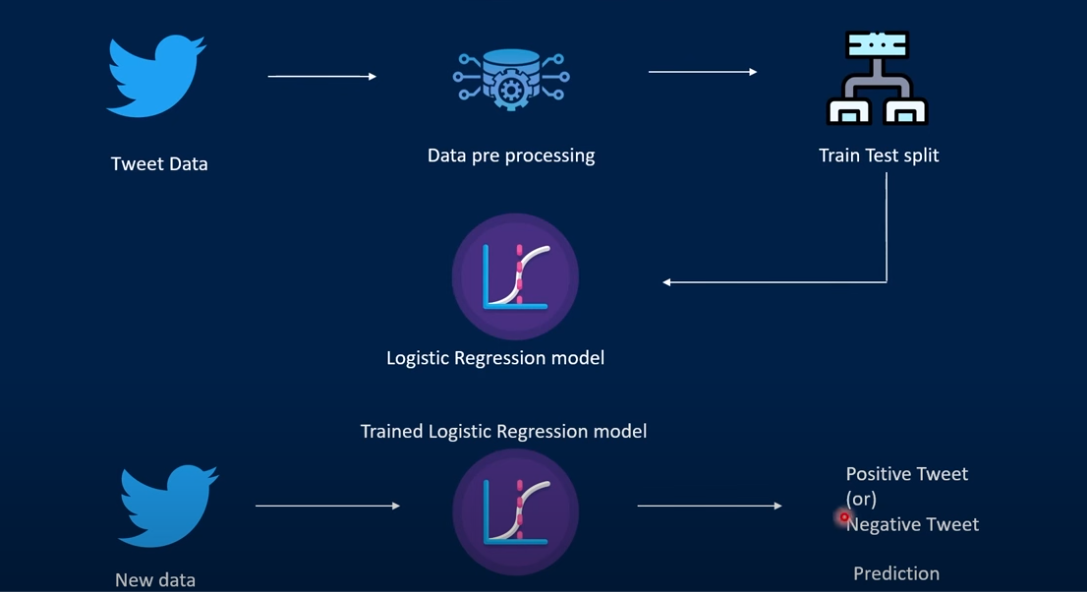

# Import Libraries

In [6]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data Processing

In [8]:
twitter_data = pd.read_csv('Twitter_Data.csv')
twitter_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [11]:
twitter_data.shape

(162980, 2)

In [12]:
twitter_data.isna().sum()

clean_text    4
category      7
dtype: int64

In [15]:
twitter_data.dropna(inplace = True)

In [16]:
twitter_data.isna().sum()

clean_text    0
category      0
dtype: int64

In [17]:
twitter_data.drop_duplicates(inplace = True)

In [19]:
twitter_data['category'].value_counts()

category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64

0 ---> Neutral Tweet

1 ---> Positive Tweet

-1 ---> Negative Tweet

# Stemming

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.

In [20]:
port_stem = PorterStemmer()

In [21]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)

    return stemmed_content

In [23]:
twitter_data['tweet'] = twitter_data['clean_text'].apply(stemming)

In [24]:
twitter_data.head()

,clean_text,category,tweet
0,when modi promised “minimum government maximum...,-1.0,modi promis minimum govern maximum govern expe...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsens continu drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcom bjp told rahul main campa...
3,asking his supporters prefix chowkidar their n...,1.0,ask support prefix chowkidar name modi great s...
4,answer who among these the most powerful world...,1.0,answer among power world leader today trump pu...


In [25]:
# Seperating the data and label
X = twitter_data['tweet'].values
Y = twitter_data['category'].values

In [26]:
print(X)

['modi promis minimum govern maximum govern expect begin difficult job reform state take year get justic state busi exit psu templ'
 'talk nonsens continu drama vote modi'
 'say vote modi welcom bjp told rahul main campaign modi think modi relax'
 ... 'cover interact forum left'
 'big project came india modi dream project happen realiti'
 'ever listen like gurukul disciplin maintain even narendra modi rss maintain cultur indian attack polit someon attack hinduism rss take action proud']


In [27]:
print(Y)

[-1.  0.  1. ...  0.  0.  1.]


Splitting data into training data and testing data

In [28]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(162969,) (130375,) (32594,)


In [30]:
print(X_train)

['mgnrega rais minimum wage significantli lift million peopl poverti exploit mgnrega bad modiji increas alloc nearli doubl upa modi promis doubl farmer incom'
 'fakendra modi chor hai fakupanti face make fool pleas dont forget remov fakendra modi fake failur shameless incompet corrupt nautankiwaj coward fear makkar govern'
 'bjp play emot game jawan death modi popular vote gather tool forens report attack site jawan bodi modi respect remors fire belli nation pride control secur question modi'
 ...
 'punish let modi uttarakhand ralli modiji accordingli punish chowkidar made live poor miser made life rich enjoy'
 'ye could havemodi took advantag elect week awayab jaa aur ukhaadna hai ukhaad'
 'dont worri modi willl win']


In [31]:
print(X_test)

['modi repeatedli say congress noth yr univers live'
 'wow that truli direct question blog minist jhoot wont answer doesnt singl iota idea anyth accept role leav chowkidari modi'
 'usual ndtv journalist favour congress keep tri modi govern come back'
 ... 'dont know rahul love ape modi'
 'nahi masood proclaim last time cut modi hand dont ask masood'
 'say modi speech mission shakti violat model code conduct']


Converting textual data to numerical data using TfidfVectorizer

In [32]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [33]:
print(X_train)

  (0, 68125)	0.2248614991186051
  (0, 66302)	0.1435219122722211
  (0, 57982)	0.26612892189445914
  (0, 51719)	0.17437940942836028
  (0, 50384)	0.12988943705645903
  (0, 49423)	0.16421731815523039
  (0, 47497)	0.09688951516287975
  (0, 43120)	0.22291765786234816
  (0, 40393)	0.16396791065369923
  (0, 40067)	0.03080998402945807
  (0, 39514)	0.1809730472121113
  (0, 39426)	0.18227525083206278
  (0, 39243)	0.4748512441133469
  (0, 35892)	0.23025229242873607
  (0, 28781)	0.16797131234622645
  (0, 28743)	0.16144962488758455
  (0, 20978)	0.15479943877392816
  (0, 20422)	0.22664524725751634
  (0, 17850)	0.3817977967743573
  (0, 5012)	0.1613648461909348
  (0, 2034)	0.22573882918468724
  (1, 57121)	0.2009082791072209
  (1, 53054)	0.1799802382125705
  (1, 48421)	0.14514755577256563
  (1, 42946)	0.28234831840981384
  :	:
  (130372, 37068)	0.33997567652902233
  (130372, 36113)	0.16866542800707918
  (130372, 35859)	0.19968513951841846
  (130372, 35639)	0.17304961608306435
  (130372, 19548)	0.2331149

In [34]:
print(X_test)

  (0, 70684)	0.3654149628097209
  (0, 66014)	0.45784497985286926
  (0, 55677)	0.24200813532769908
  (0, 53119)	0.5740234816604777
  (0, 44277)	0.3329310283820778
  (0, 40067)	0.07279159587619888
  (0, 36113)	0.30985338388557265
  (0, 13125)	0.23796675969722694
  (1, 69743)	0.23602561185313362
  (1, 69468)	0.19826967725609115
  (1, 64863)	0.2524313718526405
  (1, 62901)	0.17942214875438922
  (1, 58144)	0.20903722861121768
  (1, 53990)	0.2311755329435266
  (1, 51265)	0.16670571485515115
  (1, 40067)	0.038496991353423785
  (1, 39524)	0.14993361029132493
  (1, 35472)	0.21172428361723097
  (1, 31506)	0.31226674264058546
  (1, 30016)	0.33252736500192187
  (1, 28131)	0.2095224388833978
  (1, 17578)	0.18553313487676096
  (1, 17089)	0.2247105266594949
  (1, 11741)	0.28858700512651103
  (1, 8128)	0.2828109113508008
  :	:
  (32591, 51602)	0.3019021318548467
  (32591, 40067)	0.08155814336840318
  (32591, 36622)	0.38797626729888585
  (32591, 34162)	0.30099471305438064
  (32591, 17758)	0.29367958382

# Training Machine Learning Model

Logistic Regression

In [35]:
model = LogisticRegression(max_iter = 1000)

In [36]:
model.fit(X_train , Y_train)

LogisticRegression(max_iter=1000)

# Model Evaluation

In [37]:
#accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [38]:
print("Accuarcy Score on Training data :" ,training_data_accuracy)

Accuarcy Score on Training data : 0.8784736337488015


In [39]:
#accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [40]:
print("Accuarcy Score on Test data :" ,test_data_accuracy)

Accuarcy Score on Test data : 0.8436215254341289


# Saving the Trained Model

In [41]:
import pickle

In [42]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Using Trained Model for Future Predictions

In [43]:
#loading the trained model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [51]:
X_new = X_test[3000]
print(Y_test[3000])

prediction = loaded_model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Neutral')
elif (prediction[0]==1):
  print('The news is Positive')
else:
  print('The news is Negative')

0.0
[0.]
The news is Neutral


# Thank You!